In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D


In [2]:

# Define the path to your dataset
data_path = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train"

classes=os.listdir(data_path)
classes
# Specify parameters
img_size = (256, 256)
batch_size = 32
# Use ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Set the validation split here
)
# Create generators for training and validation sets
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",  # Specify that images are grayscale
    class_mode='categorical',
    subset='training'  # Set to 'training' for the training set
)

validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",  # Specify that images are grayscale
    class_mode='categorical',
    subset='validation'  # Set to 'validation' for the validation set
)

# Load the VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the VGG16 base
model = Sequential()
model.add(Conv2D(3,(3,3), input_shape=(256,256,1),activation='relu',padding='same'))
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=50,  # Adjust the number of epochs as needed
    validation_data=validation_generator
)

# Save the trained model
model.save("vgg16_model.h5")


Found 4845 images belonging to 5 classes.
Found 1209 images belonging to 5 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732564360.231207      80 service.cc:145] XLA service 0x7b6c44002580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732564360.231258      80 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732564360.231262      80 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1732564400.220192      80 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


152/152 ━━━━━━━━━━━━━━━━━━━━ 191s 957ms/step - accuracy: 0.6417 - loss: 1.0452 - val_accuracy: 0.6129 - val_loss: 1.2777
Epoch 2/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 79s 505ms/step - accuracy: 0.7656 - loss: 0.6089 - val_accuracy: 0.2746 - val_loss: 5.4523
Epoch 3/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 79s 500ms/step - accuracy: 0.7805 - loss: 0.5627 - val_accuracy: 0.7618 - val_loss: 0.5549
Epoch 4/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 79s 499ms/step - accuracy: 0.8115 - loss: 0.4748 - val_accuracy: 0.6617 - val_loss: 1.1839
Epoch 5/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 79s 503ms/step - accuracy: 0.8165 - loss: 0.4620 - val_accuracy: 0.7411 - val_loss: 0.5880
Epoch 6/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 79s 502ms/step - accuracy: 0.8243 - loss: 0.4535 - val_accuracy: 0.7543 - val_loss: 0.5553
Epoch 7/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 80s 505ms/step - accuracy: 0.8467 - loss: 0.4138 - val_accuracy: 0.7949 - val_loss: 0.4816
Epoch 8/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 79s 502ms/step - accuracy: 0.8359 - loss: 0.4003 - va

In [3]:
# Save the trained model
model.save("vgg16_model.h5")

In [4]:
# Assuming you have already trained and saved the model
# If not, you should load the model using model = tf.keras.models.load_model("vgg16_model.h5")

# Create a generator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test',
    target_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",  # Specify that images are grayscale
    class_mode='categorical'
)

# Evaluate the model on the test set
results = model.evaluate(test_generator)

# Print the evaluation results
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])


Found 2025 images belonging to 5 classes.
64/64 ━━━━━━━━━━━━━━━━━━━━ 39s 615ms/step - accuracy: 0.8058 - loss: 0.5948
Test Loss: 0.6094364523887634
Test Accuracy: 0.8004938364028931


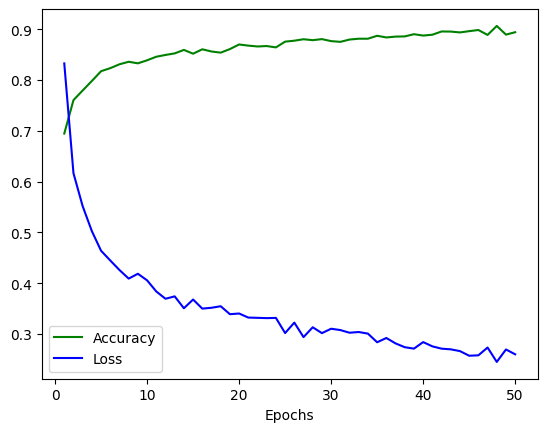

In [5]:
import matplotlib.pyplot as plt
plt.plot(range(1,51),history.history['accuracy'],color='g',label='Accuracy')
plt.plot(range(1,51),history.history['loss'],color='blue',label='Loss')
plt.xlabel('Epochs')
plt.legend()

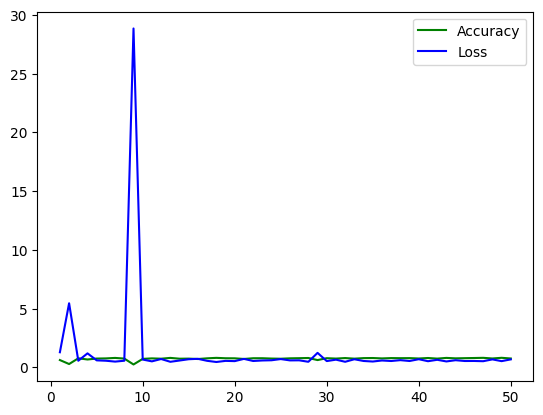

In [6]:
plt.plot(range(1,51),history.history['val_accuracy'],color='g',label='Accuracy')
plt.plot(range(1,51),history.history['val_loss'],color='b',label='Loss')
plt.legend()

64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 228ms/step


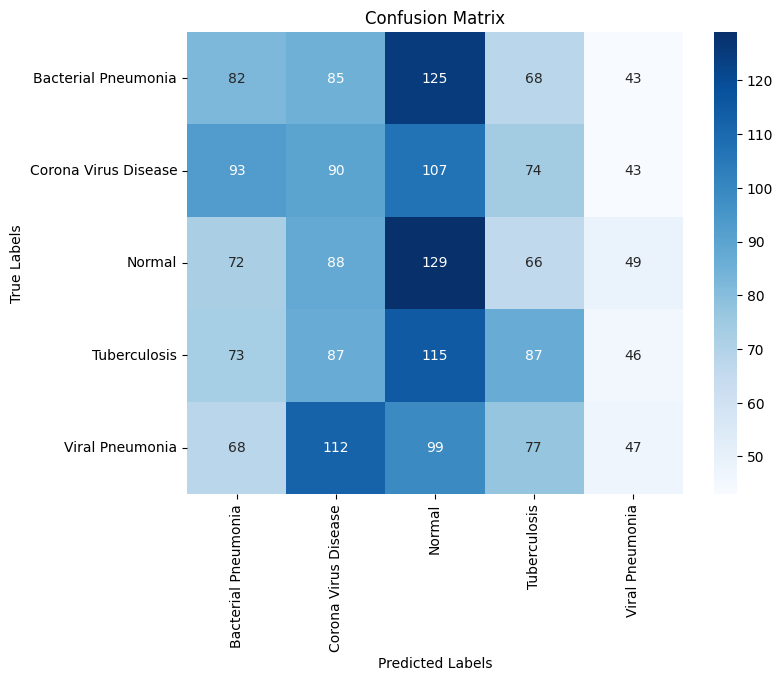

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get the true labels
true_labels = test_generator.classes

# Predict the labels using the model
predictions = model.predict(test_generator)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
